[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/soluciones/01-Introduccion-Preprocesamiento-SOL.ipynb)

# Introducción al Preprocesamiento de datos (Versión de clase)

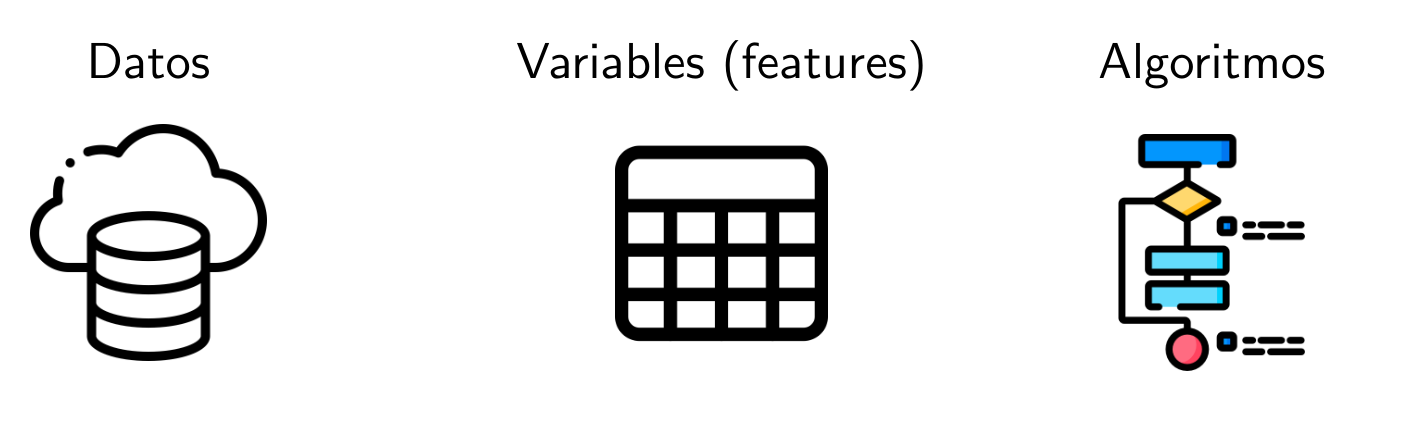

## Contenido de la sesión

En esta notebook trataremos la parte del preprocesamiento de datos. Esta introducción es presentada de forma independiente a cualquier algoritmo de Machine Learning.


    1.   Leyendo datasets
    2.   Preprocesamiento de datos



---

![](https://raw.githubusercontent.com/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/img/ML-proceso.png)

##Scikit-Learn

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

Librería muy usada para el Machine Learning en Python. Este proyecto fue iniciado en 2007 por David Cournapeau como parte del Google Summer of Code. En 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel, del INRIA, tomaron las riendas del proyecto e hicieron pública la primera versión el 1 de febrero de 2010.

La librería tiene una gran cantidad de algoritmos para muchos propósitos, desde el pre-procesamiento, el entrenamiento y optimización de modelos, métricas de desempeño, funciones de pérdida, etc. Las diferentes clases tiene un uso estandarizado e interactúan fácilmente entre ellas.

Guía de uso: https://scikit-learn.org/stable/user_guide.html

Documentación: https://scikit-learn.org/stable/

In [ ]:
import sklearn

**Referencias**

* Flach, P. A., 2012. Machine Learning : the Art and Science of Algorithms That Make Sense of Data. Cambridge University Press.

* Müller, A. C., \& Guido, S., 2016. Introduction to Machine Learning with Python: a Guide for Data Scientists. O'Reilly Media, Inc..

* García, S., Luengo, J., & Herrera, F., 2015. Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

# Leyendo la información

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL.

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes (463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

*   ¿todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
*   ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad y calidad de nuestros modelos.

**Garbage In, Garbage Out**

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.



---



En esta primer parte nos concentramos en leer datasets, lo cual ya han hecho durante algunas veces en los módulos anteriores.



*   Primero leemos un dataset en forma tabular, usando `pandas`.
*   Después damos dos ejemplos de cómo leer datasets que no están en forma tabular, en concreto: un dataset de imágenes y otro de texto.



---
### Ejemplo 1: Dataset crediticio


Este dataset contiene instancias de solicitudes de tarjetas de crédito. Todos los nombres y valores de los atributos se han omitido proteger la confidencialidad de los datos.

650 clientes (filas), 15 variables explicativas (nominales/categóricas y númericas) así como una clase (en total 16 columnas).

Más información: https://archive.ics.uci.edu/ml/datasets/credit+approval

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/crx.csv'
df1 = pd.read_csv(url,header=None)

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
df1.columns =[f"A{i + 1}" for i in range(16)]


¿Cómo identificarían si una variable, por ejemplo **A4** tiene valores faltantes?

In [ ]:
df1['A4'].unique()

array(['u', 'y', '?', 'l'], dtype=object)

De acuerdo a la información del dataset, las variables son:

* A1: b, a.
* A2: continuous.
* A3: continuous.
* A4: u, y, l, t.
* A5: g, p, gg.
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
* A7: v, h, bb, j, n, z, dd, ff, o.
* A8: continuous.
* A9: t, f.
* A10: t, f.
* A11: continuous.
* A12: t, f.
* A13: g, p, s.
* A14: continuous.
* A15: continuous.
* A16: +,- (class attribute)

## ¿Qué pasa cuando la información no se encuentra en formato de tabla

Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso.

Los datos pueden tener muchas formas diferentes:
* tablas estructuradas
* imágenes
* texto
* archivos de audio
* archivos de video

Las máquinas no entienden los datos de texto, imagen o video directamente, entienden sólo números. Por lo tanto, no es suficiente con hacer una presentación de diapositivas de todas nuestras imágenes y esperar que nuestro modelo de aprendizaje automático se entrene con eso.

Veamos un par de ejemplos.


### Ejemplo 1: Imágenes

¿Cómo podemos representar una imágen para que una modelo la entienda como un conjunto de features o variables independientes?

Leamos el dataset MNIST. Este dataset lo estaremos usando durante todo el diplomado.

Más información:

*   https://en.wikipedia.org/wiki/MNIST_database
*   http://yann.lecun.com/exdb/mnist/
*   https://www.tensorflow.org/datasets/catalog/mnist
*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Leemos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Observar que el conjunto de datos es un tensor tridimensional en lugar de ser un arreglo bidimensional de datos.

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Mostremos la primer instancia del dataset de entrenamiento, usamos la función [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib.

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

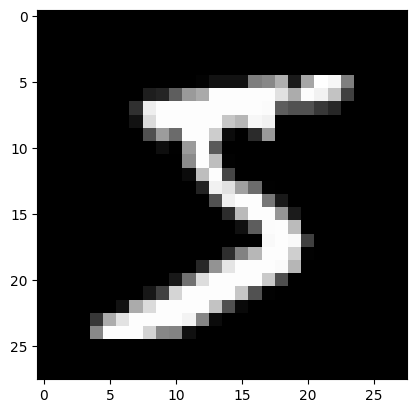

In [ ]:
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.show()

En el caso de imágenes, ya tenemos una primer forma de caracterizar estas instancias como un conjunto de features.

🔵 ¿Cuántas features tiene cada imagen?

In [ ]:
X_train[0].shape

(28, 28)

### Ejemplo 2: Texto

El enfoque más básico para trabajar con texto es el módelo *bolsa de palabras* (*Bag of words*). Una implementación la encontramos en https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Comenzamos con un conjunto de tres textos dada como una lista de strings. Usamos una lista pequeña de documentos pequeños para plasmar claramente el principio de esta representación de documentos.

In [ ]:
docs = ['Mirabai has won a silver medal in weight lifting in Tokyo olympics 2021',
                 'Sindhu has won a bronze medal in badminton in Tokyo olympics',
                 'Indian hockey team is in top four team in Tokyo olympics 2021 after 40 years']

Además, observemos la instanciación de la clase, métodos y propiedades.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# La clase que hará la bolsa de palabras
vectorizer = CountVectorizer()

# Construimos la bolsa de palabras
bag = vectorizer.fit_transform(docs)

# Imprimimos las palabras del vocabulario
print(f"Palabras del vocabulario:\n{vectorizer.get_feature_names_out()}")

# Un diccionario con el índice de cada palabra
print(f"\nDiccionario con el índice de cada palabra:\n{vectorizer.vocabulary_}")

# La matriz de features
matriz = bag.toarray()
print(f"\nDataset con esta representación:\n{matriz}")
print(f"\nShape de la matriz {matriz.shape}")

Palabras del vocabulario:
['2021' '40' 'after' 'badminton' 'bronze' 'four' 'has' 'hockey' 'in'
 'indian' 'is' 'lifting' 'medal' 'mirabai' 'olympics' 'silver' 'sindhu'
 'team' 'tokyo' 'top' 'weight' 'won' 'years']

Diccionario con el índice de cada palabra:
{'mirabai': 13, 'has': 6, 'won': 21, 'silver': 15, 'medal': 12, 'in': 8, 'weight': 20, 'lifting': 11, 'tokyo': 18, 'olympics': 14, '2021': 0, 'sindhu': 16, 'bronze': 4, 'badminton': 3, 'indian': 9, 'hockey': 7, 'team': 17, 'is': 10, 'top': 19, 'four': 5, 'after': 2, '40': 1, 'years': 22}

Dataset con esta representación:
[[1 0 0 0 0 0 1 0 2 0 0 1 1 1 1 1 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 2 0 0 0 1 0 1 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 0 1 2 1 1 0 0 0 1 0 0 2 1 1 0 0 1]]

Shape de la matriz (3, 23)


⭕ Prueba la codificación anterior con un dataset que consista en algunos textos escritos por tí (en español). Observa dos cosas:

1.   ¿Qué pasa con las stopwords eliminadas en español? Es decir, ¿qué efecto tiene el dejarlas o quitarlas en la matriz de datos?
2.   ¿La vectorización anterior distingue mayúsculas y minúsculas?

Puedes apoyarte en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [ ]:
docs_es = ['El gato se acabó su comida, y también se comió la del perro',
        'Mala suerte es que cuando termines de tender tu ropa limpia comience a llover',
        'Los chilaquiles rojos son mejores que los verdes']

In [ ]:
total_words = []
for frase in docs_es:
  words = frase.split(" ")

  words = [word.lower().replace(",", "") for word in words]
  total_words.extend(words)
total_words

['el',
 'gato',
 'se',
 'acabó',
 'su',
 'comida',
 'y',
 'también',
 'se',
 'comió',
 'la',
 'del',
 'perro',
 'mala',
 'suerte',
 'es',
 'que',
 'cuando',
 'termines',
 'de',
 'tender',
 'tu',
 'ropa',
 'limpia',
 'comience',
 'a',
 'llover',
 'los',
 'chilaquiles',
 'rojos',
 'son',
 'mejores',
 'que',
 'los',
 'verdes']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')


# Stopwords en español
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Creamos un objeto CountVectorizer con stopwords eliminadas
vectorizer = CountVectorizer(stop_words=spanish_stopwords)

# Construimos la bolsa de palabras
bag = vectorizer.fit_transform(docs_es)

# Imprimimos las palabras del vocabulario
print(f"Palabras del vocabulario:\n{vectorizer.get_feature_names_out()}")

# Un diccionario con el índice de cada palabra
print(f"\nDiccionario con el índice de cada palabra:\n{vectorizer.vocabulary_}")

# La matriz de features
matriz = bag.toarray()
print(f"\nDataset con esta representación:\n{matriz}")
print(f"\nShape de la matriz {matriz.shape}")


Palabras del vocabulario:
['acabó' 'chilaquiles' 'comida' 'comience' 'comió' 'gato' 'limpia'
 'llover' 'mala' 'mejores' 'perro' 'rojos' 'ropa' 'suerte' 'tender'
 'termines' 'verdes']

Diccionario con el índice de cada palabra:
{'gato': 5, 'acabó': 0, 'comida': 2, 'comió': 4, 'perro': 10, 'mala': 8, 'suerte': 13, 'termines': 15, 'tender': 14, 'ropa': 12, 'limpia': 6, 'comience': 3, 'llover': 7, 'chilaquiles': 1, 'rojos': 11, 'mejores': 9, 'verdes': 16}

Dataset con esta representación:
[[1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1]]

Shape de la matriz (3, 17)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocesamiento de datos

En cualquier proceso de Machine Learning, el preprocesamiento (PP) es el paso en el que los datos se transforman o codifican para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente.

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)




## Limpieza de Datos

Involucra operaciones como
* **Corrección** de datos
* **Filtrar datos** especificios o incorrectos
* **Reducir detalles** innecesarios.

Algunas veces se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo).

Otras operaciones son la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido).

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

Continuamos con el ejemplo de la aprobación de créditos que comenzamos arriba al inicio de la notebook

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/crx.csv'
df = pd.read_csv(url,header=None)
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Cambiamos los nombres de las columnas para hacerlos coincidir con los datos originales del dataset.

In [ ]:
mapping_dict = {j:'A'+str(j+1) for j in range(16)}
mapping_dict[15] = 'class'

df.rename(columns=mapping_dict, inplace=True)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Conservaremos el dataframe original en la variable `df`

⭕ Ejercicio:

1. Ahora queremos remover (por alguna razón) los registros de la matriz donde la variable A4 == 'u' (reducir detalles no necesarios).

2. También podriamos querer acotarnos a un rango de valores, por ejemplo para la
variable 'A3' entre 4 y 10 (filtrar datos específicos).

3. En particular, queremos cambiar el valor de la columna ``class`` de $\{-,+\}$ a $\{0,1\}$ (corrección de datos).

Tarea 1. Remover los registros de la matriz donde la variable `A4` == 'u'.

In [ ]:
df_limpio = df[df['A4']!='u'].copy()
df_limpio

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,00320,0,+
38,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,f,g,00260,500,+
44,b,56.42,28.000,y,p,c,v,28.500,t,t,40,f,g,00000,15,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,-


Tarea 2:  Acotar a un rango de valores, la variable 'A3' debe de estar entre 4 y 10.

In [ ]:
df_limpio = df_limpio[(df_limpio['A3']<=10)&(df_limpio['A3']>=4)]
df_limpio

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,00320,0,+
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
104,b,27.83,4.000,y,p,i,h,5.750,t,t,2,t,g,00075,0,-
147,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,00000,2300,+
194,b,34.50,4.040,y,p,i,bb,8.500,t,t,7,t,g,00195,0,+
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,00144,7,+
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,00080,500,+


Tarea 3: Cambiar el valor de la columna class de $\{−,+\}$ a $\{−1,1\}$.

In [ ]:
df_limpio.replace({'-':0,'+':1},inplace=True)
df_limpio

<ipython-input-19-6091b9aeaf6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.replace({'-':0,'+':1},inplace=True)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,00320,0,1
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
104,b,27.83,4.000,y,p,i,h,5.750,t,t,2,t,g,00075,0,0
147,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,00000,2300,1
194,b,34.50,4.040,y,p,i,bb,8.500,t,t,7,t,g,00195,0,1
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,00144,7,1
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,1
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,00080,500,1


Una vez que hemos terminos de descartar algunos datos podemos resetear el índice.

In [ ]:
df_limpio.reset_index(inplace=True,drop=True)
df_limpio

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1
1,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,00320,0,1
2,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
3,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
4,b,27.83,4.000,y,p,i,h,5.750,t,t,2,t,g,00075,0,0
5,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,00000,2300,1
6,b,34.50,4.040,y,p,i,bb,8.500,t,t,7,t,g,00195,0,1
7,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,00144,7,1
8,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,1
9,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,00080,500,1


⭕ Ejercicio:

¿Hay valores faltantes en alguna columna? En caso de que sí lo haya, eliminaremos dichas columnas. Al final, resetear el índice.

In [ ]:
df_limpio.drop(index=[20,28],inplace=True)
df_limpio

<ipython-input-21-bfd813ac85ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio.drop(index=[20,28],inplace=True)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,1
1,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,00320,0,1
2,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
3,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,0
4,b,27.83,4.000,y,p,i,h,5.750,t,t,2,t,g,00075,0,0
5,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,00000,2300,1
6,b,34.50,4.040,y,p,i,bb,8.500,t,t,7,t,g,00195,0,1
7,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,00144,7,1
8,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,1
9,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,00080,500,1


In [ ]:
df_limpio.reset_index(inplace=True,drop=True)

## Imputación de datos faltantes.

Por diversas razones, muchos conjuntos de datos del mundo real contienen valores perdidos. Sin embargo, estos conjuntos de datos son incompatibles con los estimadores de scikit-learn, que asumen que todos los valores de una matriz son numéricos.

Típicamente los valores faltantes están indicados como [numpy.nan](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

Hay varias estrategias para imputar valores faltantes:

* Descartar filas y/o columnas enteras que contengan valores perdidos. Sin embargo, esto tiene el precio de perder datos que pueden ser valiosos (aunque estén incompletos).
* Imputar los valores que faltan, es decir, deducirlos de la parte conocida de los datos. Por ejemplo:
    * Usar el promedio.
    * Usar la mediana.
    * Usar la moda (el valor más frecuente).
    * Usar algún valor constante.

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

Hay algunos patrones que se pueden presentar en los datos faltantes. Diferentes patrones pueden ser tratados con diferentes estrategias más especializadas.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

https://stefvanbuuren.name/fimd/missing-data-pattern.html




**¿Cómo exploramos los valores faltantes?**

Trabajaremos con la versión original del dataframe `df`. Exploremos, por ejemplo, los datos faltantes en la columna `A2`

In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
# Podemos ver las filas del dataframe que tienen valores faltantes en la columna A2:
display(df[df['A2'].isnull()])

# Podemos contar las filas del dataframe que tienen valores faltantes en la columna A2:
print(f"Cantidad de entradas nulas: {df[df['A2'].isnull()].shape[0]}")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class


Cantidad de entradas nulas: 0


Veamos los valores únicos de la columna

In [ ]:
df['A2'].unique()

array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
       '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
       '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
       '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
       '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
       '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
       '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
       '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
       '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
       '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
       '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
       '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
       '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
       '18.67', '54.83', '40.92', '19.75', '29.17', '24.58', '33.75',
       '25.42',

In [ ]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


La información del dataset dice que las columnas `A2`, `A3`, `A8`, `A11`, `A14`, `A15` son continuas, sin embargo, la tabla anterior nos dice otra cosa.

![](https://pbpython.com/images/pandas_dtypes.png)

Exploremos los tipos de cada columna

In [ ]:
# Ver los tipos de datos de cada columna
df.dtypes

A1        object
A2        object
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14       object
A15        int64
class     object
dtype: object

Cambiemos el tipo de las columnas `A2` y `A14`.

In [ ]:
import numpy as np

# Podríamos convertir el tipo así:
# df2 = df.copy()
# df2['A2'].astype('float')

def cambiar_tipo(x):
    try:
        return float(x)
    except:
        return np.nan

# Aplicamos la función en cada columna que presenta el problema
columnas = ['A2','A14']
for columna in columnas:
    df[columna] = df[columna].apply(cambiar_tipo)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


Veamos cómo quedaron los tipos de las variables

In [ ]:
df.dtypes

A1        object
A2       float64
A3       float64
A4        object
A5        object
A6        object
A7        object
A8       float64
A9        object
A10       object
A11        int64
A12       object
A13       object
A14      float64
A15        int64
class     object
dtype: object

¿Cuántos valores faltantes tiene la columna `A2`?

In [ ]:
df[df['A2'].isnull()].shape[0]

12

Veamos cómo se ven esos renglones

In [ ]:
df[df['A2'].isnull()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,928.0,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,0.0,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,200.0,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,290.0,2279,+


Hagamos la imputación de valores faltantes en la columna `A2`. Para esto usaremos scikit-learn, el cual tiene un [submódulo](https://scikit-learn.org/stable/modules/impute.html) para hacer imputación.

**Otra vez, observa la instanciación de la clase, así como los métodos**

In [80]:
from sklearn.impute import SimpleImputer

A2_values = df['A2'].values

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
A2_new_values = imp.fit_transform(A2_values.reshape(-1,1))  # Aquí, observa que el método requiere que los valores sean un vector columna
A2_new_values

KeyError: 'A2'

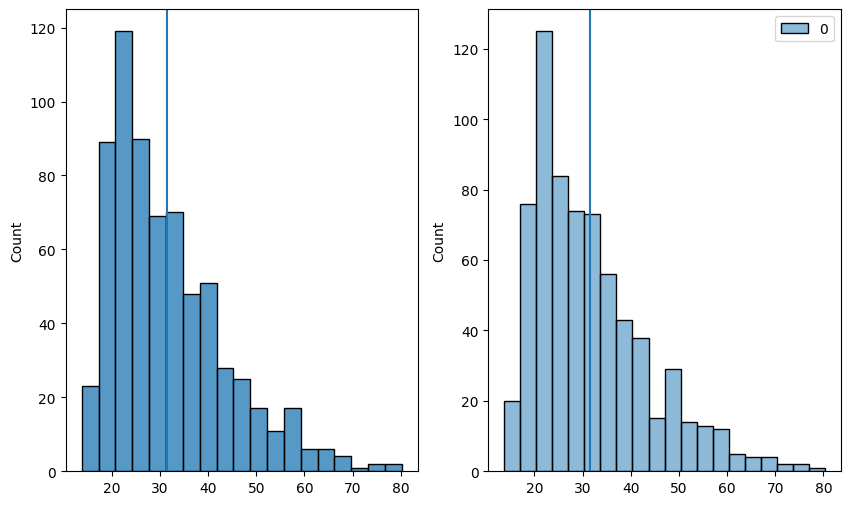

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(A2_values)
plt.axvline(x=np.nanmean(A2_values))
plt.subplot(1,2,2)
sns.histplot(A2_new_values)
plt.axvline(x=np.mean(A2_new_values))
plt.show()

¿Cómo son ambos promedios?

In [ ]:
np.nanmean(A2_values),np.mean(A2_new_values)

(31.56817109144543, 31.56817109144543)

❓ ¿Por qué son iguales?

Regresemos la nueva columna al dataframe original

In [ ]:
df['A2'] = A2_new_values.reshape(-1,)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


Comprobemos que ya no hay entradas faltantes en esa columna

In [ ]:
df[df['A2'].isnull()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class


También funciona para valores categóricos, aunque sólo en las estrategias `most_frequent` y `constant`. Veamos la columna `A4`.

In [ ]:
df['A4'].unique()

array(['u', 'y', '?', 'l'], dtype=object)

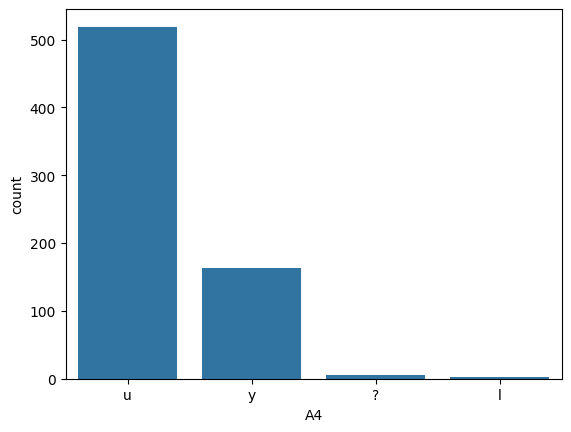

In [ ]:
sns.countplot(x=df['A4'])
plt.show()

In [91]:
imp_categorico = SimpleImputer(missing_values='?', strategy='most_frequent')
A4_new_values = imp_categorico.fit_transform(df['A4'].values.reshape(-1,1))

KeyError: 'A4'

In [ ]:
imp_categorico = SimpleImputer(missing_values='?', strategy='constant',fill_value='t')
A4_new_values = imp_categorico.fit_transform(df['A4'].values.reshape(-1,1))

⭕ Regresa la nueva columna al dataframe original, comprueba que ya no hay valores faltantes.

## Normalización de los Datos (re-escalamiento).

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 mbar.  
>> * ¿Qué variable predomina más?
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 5 mbar de presión?

**La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).**

Se trata de re-escalar el intervalo en el que se encuentran los datos al intervalo $[0,1]$ (o cualquier otro).

🔵 Ejercicio: Escalar los valores de las columnas A3 y A15 entre 0 y 1. Esto puede hacerse de dos maneras:

1. Utiliza la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Usar el [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de scikit-learn.



---


También podríamos escalar entre dos valores arbitrarios $q$ y $z$, tal que $q<z$. Por ejemplo, escalar al intervalo $[-1,1]$.

Para esto, utilizamos la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


**Parentesis:** Una de las raíces de las dificultades que se presentan al tener escalas de valores muy diferentes es el **error de absorción**:

In [ ]:
eps = 0.0000000000001
x0 = 100000
num_iteraciones = 10000

for k in range(num_iteraciones):
    x0 += eps
print(f"Estrategia 1: {x0}")

x_final = x0 + num_iteraciones*eps
print(f"Estrategia 2: {x_final}")

Estrategia 1: 100000.0
Estrategia 2: 100000.000000001


Continuamos con la normalización de datos

In [ ]:
df_limpio = df.copy()

In [ ]:
a3 = df_limpio['A3'].min()
b3 = df_limpio['A3'].max()
print(f"El máximo y mínimo de la columna 'A3': {b3,a3}")
a15 = df_limpio['A15'].min()
b15 = df_limpio['A15'].max()
print(f"El máximo y mínimo de la columna 'A15': {b15,a15}")

df_limpio['A3'] = df_limpio['A3'].apply(lambda x: (x-a3)/(b3-a3))
df_limpio['A15'] = df_limpio['A15'].apply(lambda x: (x-a15)/(b15-a15))
df_limpio

El máximo y mínimo de la columna 'A3': (28.0, 0.0)
El máximo y mínimo de la columna 'A15': (100000, 0)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000000,u,g,w,v,1.25,t,t,1,f,g,202.0,0.00000,+
1,a,58.67,0.159286,u,g,q,h,3.04,t,t,6,f,g,43.0,0.00560,+
2,a,24.50,0.017857,u,g,q,h,1.50,t,f,0,f,g,280.0,0.00824,+
3,b,27.83,0.055000,u,g,w,v,3.75,t,t,5,t,g,100.0,0.00003,+
4,b,20.17,0.200893,u,g,w,v,1.71,t,f,0,f,s,120.0,0.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,0.360179,y,p,e,h,1.25,f,f,0,f,g,260.0,0.00000,-
686,a,22.67,0.026786,u,g,c,v,2.00,f,t,2,t,g,200.0,0.00394,-
687,a,25.25,0.482143,y,p,ff,ff,2.00,f,t,1,t,g,200.0,0.00001,-
688,b,17.92,0.007321,u,g,aa,v,0.04,f,f,0,f,g,280.0,0.00750,-


Usando el módulo ``preprocessing`` de Scikit-Learn

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(df_limpio[['A3','A8']])
datos_normalizados

array([[0.25684211, 0.101     ],
       [0.67548872, 0.0215    ],
       [0.16165414, 0.14      ],
       ...,
       [0.17293233, 0.1       ],
       [0.06270677, 0.14      ],
       [0.31954887, 0.        ]])

In [100]:
df_limpio.loc[:,['A3','A8']] = datos_normalizados
df_limpio

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,0.256842,0.256842,u,g,w,v,0.1010,t,t,1,f,g,0.1010,0.00000,+
1,a,0.675489,0.675489,u,g,q,h,0.0215,t,t,6,f,g,0.0215,0.00560,+
2,a,0.161654,0.161654,u,g,q,h,0.1400,t,f,0,f,g,0.1400,0.00824,+
3,b,0.211729,0.211729,u,g,w,v,0.0500,t,t,5,t,g,0.0500,0.00003,+
4,b,0.096541,0.096541,u,g,w,v,0.0600,t,f,0,f,s,0.0600,0.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,0.110226,0.110226,y,p,e,h,0.1300,f,f,0,f,g,0.1300,0.00000,-
686,a,0.134135,0.134135,u,g,c,v,0.1000,f,t,2,t,g,0.1000,0.00394,-
687,a,0.172932,0.172932,y,p,ff,ff,0.1000,f,t,1,t,g,0.1000,0.00001,-
688,b,0.062707,0.062707,u,g,aa,v,0.1400,f,f,0,f,g,0.1400,0.00750,-


In [ ]:
df_limpio.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,0.169954,0.078014,2.40000,184.014771,0.010174
std,11.853273,0.177792,0.117422,4.86294,173.806768,0.052101
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,0.035714,0.005789,0.00000,75.000000,0.000000
50%,28.625000,0.098214,0.035088,0.00000,160.000000,0.000050
75%,37.707500,0.257411,0.092105,3.00000,276.000000,0.003955
max,80.250000,1.000000,1.000000,67.00000,2000.000000,1.000000


⭕ Ejercicio.

Aplica esta normalización a todos las columnas de datos apropiadas y muestra el dataframe con los datos normalizados. **Ten cuidado con posibles datos faltantes**.

Usa la clase MinMaxScaler

In [90]:
datos_normalizados = scaler.fit_transform(df_limpio[['A2','A14']])
datos_normalizados
df_limpio.loc[:,['A2','A14']] = datos_normalizados
df_limpio

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,0.256842,0.000000,u,g,w,v,0.043860,t,t,1,f,g,0.1010,0.00000,+
1,a,0.675489,0.159286,u,g,q,h,0.106667,t,t,6,f,g,0.0215,0.00560,+
2,a,0.161654,0.017857,u,g,q,h,0.052632,t,f,0,f,g,0.1400,0.00824,+
3,b,0.211729,0.055000,u,g,w,v,0.131579,t,t,5,t,g,0.0500,0.00003,+
4,b,0.096541,0.200893,u,g,w,v,0.060000,t,f,0,f,s,0.0600,0.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,0.110226,0.360179,y,p,e,h,0.043860,f,f,0,f,g,0.1300,0.00000,-
686,a,0.134135,0.026786,u,g,c,v,0.070175,f,t,2,t,g,0.1000,0.00394,-
687,a,0.172932,0.482143,y,p,ff,ff,0.070175,f,t,1,t,g,0.1000,0.00001,-
688,b,0.062707,0.007321,u,g,aa,v,0.001404,f,f,0,f,g,0.1400,0.00750,-


## Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*.

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
* **construcción de características**.
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**.

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como:
* la generación de informes
* nuevos atributos que agregan los existentes
* generalización de conceptos, especialmente en atributos categóricos (por ejemplo, la sustitución de fechas completas por solo números de año).

🔵 Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)


**Actividad**: Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito.

¿Qué valores toman las variables categóricas

In [ ]:
df['A4'].unique()

array(['u', 'y', '?', 'l'], dtype=object)

In [ ]:
imp_categorico = SimpleImputer(missing_values='?', strategy='most_frequent')
A4_new_values = imp_categorico.fit_transform(df['A4'].values.reshape(-1, 1))

In [ ]:
df['A4'] = A4_new_values.reshape(-1,)
print(df['A4'].unique())
df

['u' 'y' 'l']


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
df['A5'].unique()

array(['g', 'p', '?', 'gg'], dtype=object)

Creamos las columnas con *one-hot encoding*

In [ ]:
cat_columns = ['A4']
df_proc = pd.get_dummies(df,prefix='category',prefix_sep='_',columns=cat_columns)
df_proc.sample(10)

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class,category_l,category_u,category_y
485,b,74.83,19.000,p,ff,ff,0.040,f,t,2,f,g,0.0,351,-,False,False,True
545,b,44.25,11.000,p,d,v,1.500,t,f,0,f,s,0.0,0,-,False,False,True
436,b,19.58,0.585,g,ff,ff,0.000,f,t,3,f,g,350.0,769,-,False,True,False
283,a,16.50,1.250,g,q,v,0.250,f,t,1,f,g,108.0,98,-,False,True,False
556,b,29.58,4.500,g,w,v,7.500,t,t,2,t,g,330.0,0,+,False,True,False
627,b,36.08,2.540,g,ff,ff,0.000,f,f,0,f,g,0.0,1000,-,False,True,False
32,b,49.50,7.585,g,i,bb,7.585,t,t,15,t,g,0.0,5000,+,False,True,False
596,a,46.08,3.000,g,c,v,2.375,t,t,8,t,g,396.0,4159,+,False,True,False
606,b,16.17,0.040,g,c,v,0.040,f,f,0,f,g,0.0,0,+,False,True,False
284,b,23.25,12.625,g,c,v,0.125,f,t,2,f,g,0.0,5552,-,False,True,False


## Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos.

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante.

Las operaciones típicas logradas dentro de la integración de datos son la
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

## Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificación** de ruido en lugar de la **eliminación** de ruido.

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la corrección que podría involucrar algún tipo de operación subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


## Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ tal que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce.

![](https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v)

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un
  * **tiempo de computo específico**
  * **memoria** específica.
  * **tamaño del conjunto de datos**

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  




Feature Selection: Son las técnicas para elegir ciertas variables que mejor representen a un conjunto de datos. Podemos considerarla como una técnica de reducción de dimensionalidad.

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) selecciona las mejores $k$ variables de acuerdo a alguna prueba estadística.
* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) elimina variable con una varianza baja. Esto no se combina bien con la normalización.

En el siguiente ejemplo, descartamos la tercera coordenada:

$$(x,y,z)\mapsto (x,y)$$

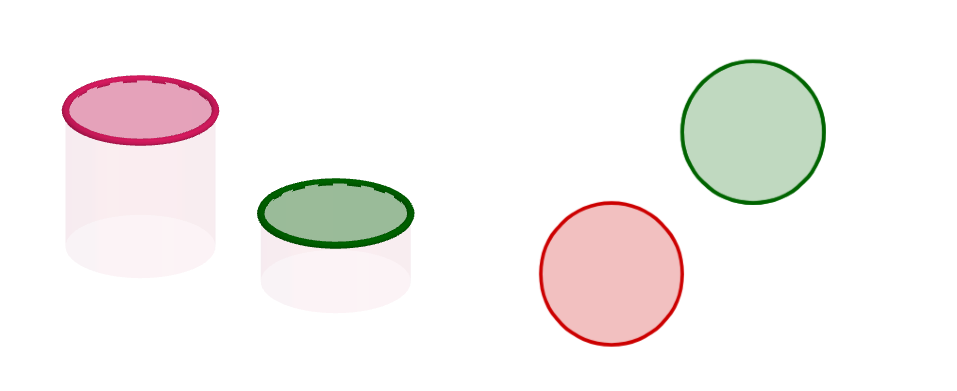

Respecto a la **memoria** y **tamaño del conjunto de datos**, estos se encuentra relacionados a la **Maldición de la Dimensionalidad** (Curse of Dimensionality en inglés).
La maldición de la dimensionalidad es una familia de fenómenos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones.

**Alta Dimensionalidad**

***Espacio de Características*** (Feature Space en inglés); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendrán las variables del problema.

Ahora supongamos que queremos realizar una predicción usando solo una dimensión que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  
![](https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH)
        
Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¡solo cubre $1/9 \approx 11 \text{%}$!
![](https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK)

Si añadimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrirá $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones.        
![](https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90)

De hecho

<img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">




# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

In [2]:
columns = ["Number of times pregnant",
"Plasma glucose concentration",
"Diastolic blood pressure (mm Hg)",
"Triceps skinfold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body mass index",
"Diabetes pedigree function",
"Age",
"Class"]

In [3]:
df.columns = columns

In [4]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Number of times pregnant          768 non-null    int64  
 1   Plasma glucose concentration      768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)  768 non-null    int64  
 3   Triceps skinfold thickness (mm)   768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)    768 non-null    int64  
 5   Body mass index                   768 non-null    float64
 6   Diabetes pedigree function        768 non-null    float64
 7   Age                               768 non-null    int64  
 8   Class                             768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


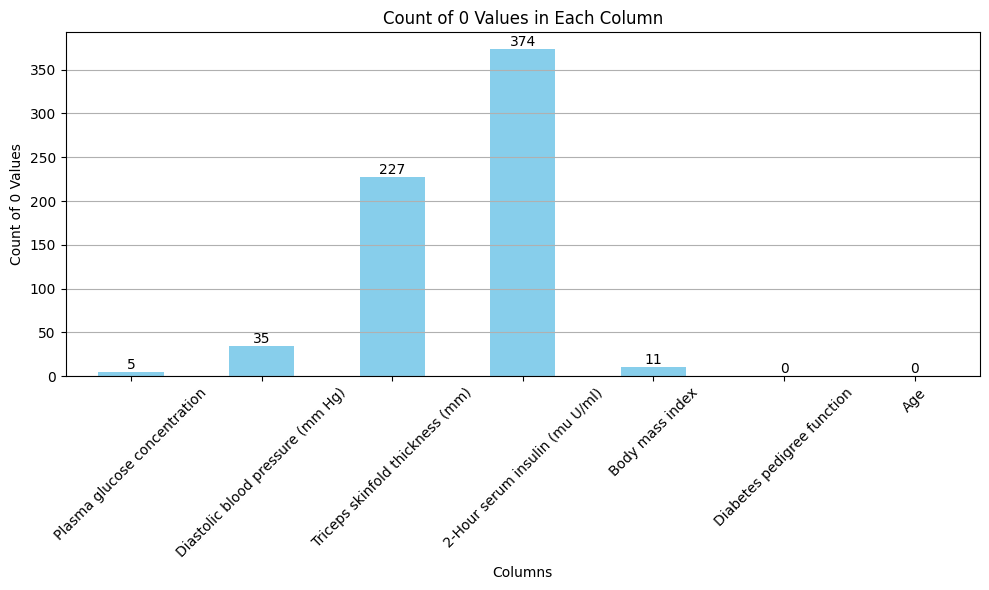

In [6]:
# Specify the columns to include, excluding the first and last columns
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_include = df.columns[1:-1]

# Select only the specified columns
holder = df[columns_to_include]

# Count instances with 0 values in each column
zero_counts = (holder == 0).sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = zero_counts.plot(kind='bar', color='skyblue')
plt.title('Count of 0 Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of 0 Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:
columns_to_include

Index(['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)',
       'Triceps skinfold thickness (mm)', '2-Hour serum insulin (mu U/ml)',
       'Body mass index', 'Diabetes pedigree function', 'Age'],
      dtype='object')

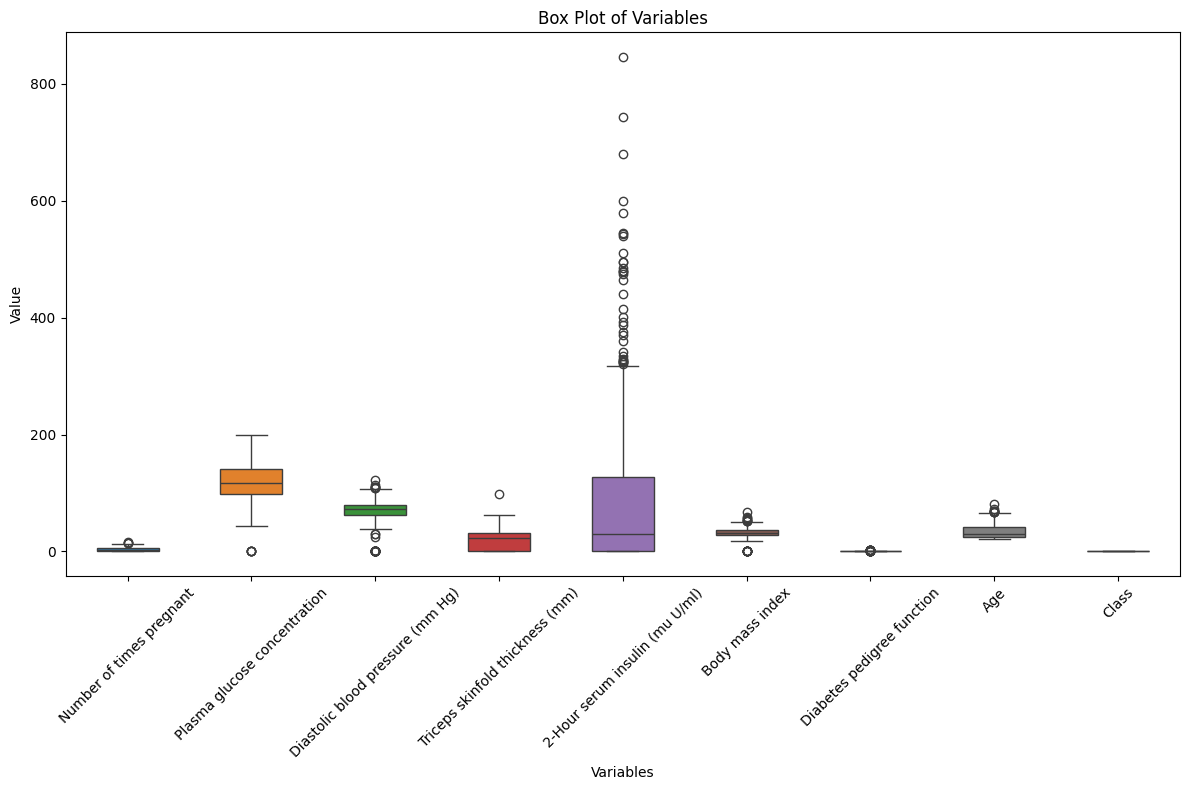

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='v', width=0.5)
plt.title('Box Plot of Variables')
plt.ylabel('Value')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
for column in columns_to_include:
    values = sorted(df[column].unique())
    max = values[-1]
    min = values[0]
    if min == 0:
      min = values[1]
    print(f"Range of '{column}': {max} - {min} = {max - min}")

Range of 'Plasma glucose concentration': 199 - 44 = 155
Range of 'Diastolic blood pressure (mm Hg)': 122 - 24 = 98
Range of 'Triceps skinfold thickness (mm)': 99 - 7 = 92
Range of '2-Hour serum insulin (mu U/ml)': 846 - 14 = 832
Range of 'Body mass index': 67.1 - 18.2 = 48.89999999999999
Range of 'Diabetes pedigree function': 2.42 - 0.078 = 2.342
Range of 'Age': 81 - 21 = 60


⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*

In [10]:
columns_to_include

Index(['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)',
       'Triceps skinfold thickness (mm)', '2-Hour serum insulin (mu U/ml)',
       'Body mass index', 'Diabetes pedigree function', 'Age'],
      dtype='object')

In [11]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
from sklearn.impute import SimpleImputer

new_values = df[['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)',
       'Triceps skinfold thickness (mm)']].values
imp = SimpleImputer(missing_values=0, strategy='mean')
datos_normalizados = imp.fit_transform(new_values)

df.loc[:, ['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)',
       'Triceps skinfold thickness (mm)']] = datos_normalizados
df


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1


In [13]:
new_values = df['2-Hour serum insulin (mu U/ml)'].values
imp = SimpleImputer(missing_values=0, strategy='median')
datos_normalizados = imp.fit_transform(new_values.reshape(-1,1))

df.loc[:, ["2-Hour serum insulin (mu U/ml)"]] = datos_normalizados
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148.0,72.0,35.00000,125,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125,30.1,0.349,47,1


In [14]:
new_values = df['Body mass index'].values
imp = SimpleImputer(missing_values=0, strategy='most_frequent')
datos_normalizados = imp.fit_transform(new_values.reshape(-1,1))

df.loc[:, ["Body mass index"]] = datos_normalizados
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148.0,72.0,35.00000,125,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125,30.1,0.349,47,1


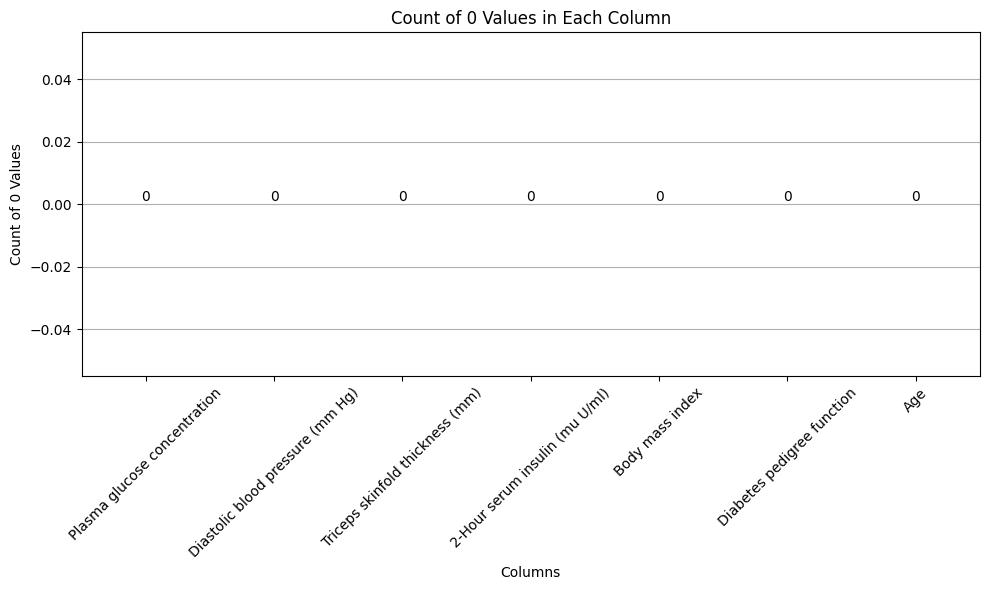

In [15]:
holder = df[columns_to_include]

# Count instances with 0 values in each column
zero_counts = (holder == 0).sum()

# Plotting
plt.figure(figsize=(10, 6))
bars = zero_counts.plot(kind='bar', color='skyblue')
plt.title('Count of 0 Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of 0 Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
df_limpio =df[df['Body mass index'] > 24.9]

In [17]:
 df_limpio

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148.0,72.0,35.00000,125,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125,26.6,0.351,31,0
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
5,5,116.0,74.0,29.15342,125,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125,30.1,0.349,47,1


In [18]:
columns_to_include = list(columns_to_include)[:-1]

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(df_limpio[columns_to_include])
df_limpio.loc[:, columns_to_include] = datos_normalizados
df_limpio

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,0.670968,0.533333,0.304348,0.133413,0.204276,0.234415,50,1
1,1,0.264516,0.466667,0.239130,0.133413,0.038005,0.116567,31,0
3,1,0.290323,0.466667,0.173913,0.096154,0.073634,0.038002,21,0
4,0,0.600000,0.177778,0.304348,0.185096,0.429929,0.943638,33,1
5,5,0.464516,0.555556,0.240798,0.133413,0.014252,0.052519,30,0
...,...,...,...,...,...,...,...,...,...
763,10,0.367742,0.577778,0.445652,0.199519,0.187648,0.039710,63,0
764,2,0.503226,0.511111,0.217391,0.133413,0.280285,0.111870,27,0
765,5,0.496774,0.533333,0.173913,0.117788,0.028504,0.071307,30,0
766,1,0.529032,0.400000,0.240798,0.133413,0.121140,0.115713,47,1


In [22]:
cat_columns = ['Class']
df_proc = pd.get_dummies(df_limpio,prefix='category_class',prefix_sep='_',columns=cat_columns)

In [23]:
df_proc

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,category_class_0,category_class_1
0,6,0.670968,0.533333,0.304348,0.133413,0.204276,0.234415,50,False,True
1,1,0.264516,0.466667,0.239130,0.133413,0.038005,0.116567,31,True,False
3,1,0.290323,0.466667,0.173913,0.096154,0.073634,0.038002,21,True,False
4,0,0.600000,0.177778,0.304348,0.185096,0.429929,0.943638,33,False,True
5,5,0.464516,0.555556,0.240798,0.133413,0.014252,0.052519,30,True,False
...,...,...,...,...,...,...,...,...,...,...
763,10,0.367742,0.577778,0.445652,0.199519,0.187648,0.039710,63,True,False
764,2,0.503226,0.511111,0.217391,0.133413,0.280285,0.111870,27,True,False
765,5,0.496774,0.533333,0.173913,0.117788,0.028504,0.071307,30,True,False
766,1,0.529032,0.400000,0.240798,0.133413,0.121140,0.115713,47,False,True
